In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
import pandas as pd

In [4]:
# View the first few rows of the feature data
print(X.head())

# View the target variable (heart disease prediction labels)
print(y.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
   num
0    0
1    2
2    1
3    0
4    0


In [5]:
# Check for missing values
print(X.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [9]:
# Drop rows with missing values
X = X.dropna()

In [10]:
print(X.isnull().sum())  # Should show 0 for all columns


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


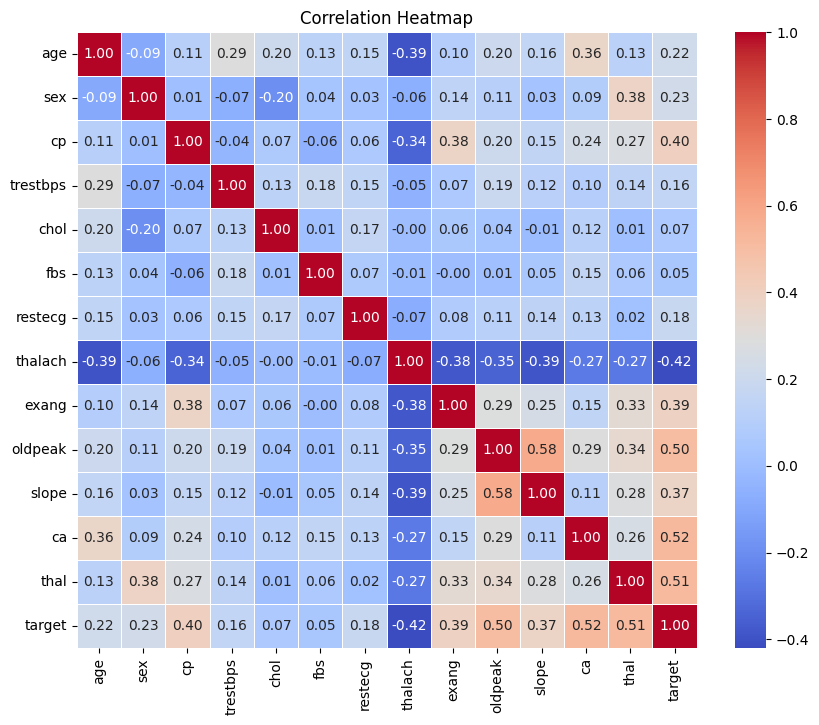

In [13]:
# Add target variable to X for correlation analysis
X['target'] = y

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


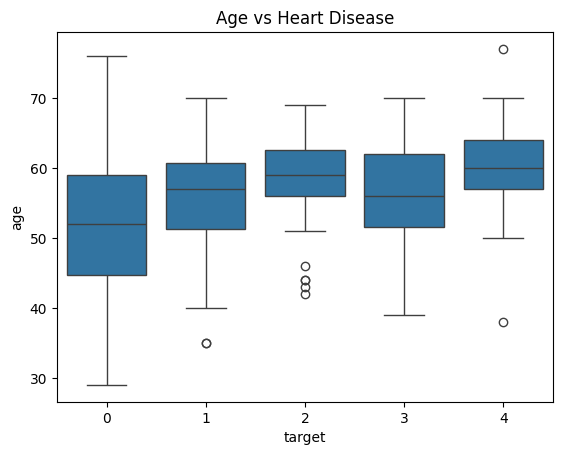

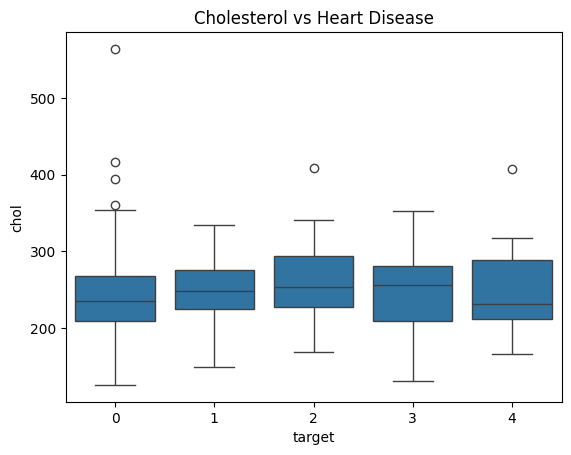

In [14]:
# Boxplot: Age vs. Heart Disease
sns.boxplot(x='target', y='age', data=X)
plt.title('Age vs Heart Disease')
plt.show()

# Boxplot: Cholesterol vs. Heart Disease
sns.boxplot(x='target', y='chol', data=X)
plt.title('Cholesterol vs Heart Disease')
plt.show()


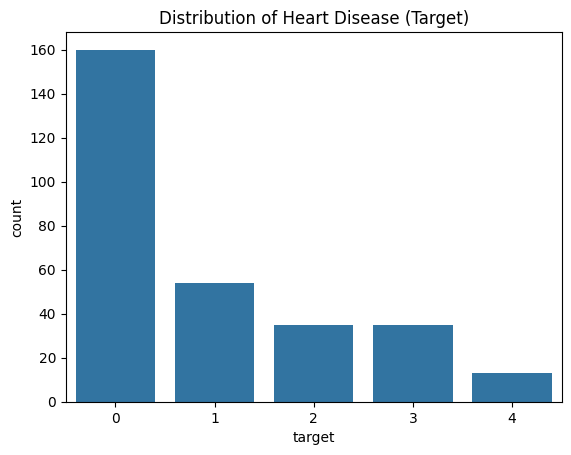

In [15]:
# Distribution of the target variable
sns.countplot(x='target', data=X)
plt.title('Distribution of Heart Disease (Target)')
plt.show()


In [16]:
from scipy import stats

# Separate age data by target (heart disease or not)
age_with_disease = X[X['target'] == 1]['age']
age_without_disease = X[X['target'] == 0]['age']

# Perform t-test
t_stat, p_value = stats.ttest_ind(age_with_disease, age_without_disease)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 2.0573628743309866
P-value: 0.04087512062086711


In [17]:
# Correlation between age and cholesterol
correlation = X['age'].corr(X['chol'])
print(f"Correlation between Age and Cholesterol: {correlation}")


Correlation between Age and Cholesterol: 0.20264354584662692


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print(X.shape)  # Check shape of X (features)
print(y.shape)  # Check shape of y (target)



(297, 14)
(303, 1)


In [23]:
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Drop rows with missing values in the DataFrame
df = df.dropna()

# Separate X and y again
X = df.drop(columns='target')  # Drop the target column
y = df['target']  # Only keep the target column



In [24]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 63.33%


In [28]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[34  1  0  1  0]
 [ 3  3  0  2  1]
 [ 1  2  1  1  0]
 [ 0  3  2  0  2]
 [ 1  1  0  1  0]]


In [29]:
from sklearn.metrics import classification_report

# Get precision, recall, F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91        36
         1.0       0.30      0.33      0.32         9
         2.0       0.33      0.20      0.25         5
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.30      0.30      0.29        60
weighted avg       0.60      0.63      0.61        60



In [30]:
from sklearn.metrics import classification_report

# Get precision, recall, F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91        36
         1.0       0.30      0.33      0.32         9
         2.0       0.33      0.20      0.25         5
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.30      0.30      0.29        60
weighted avg       0.60      0.63      0.61        60



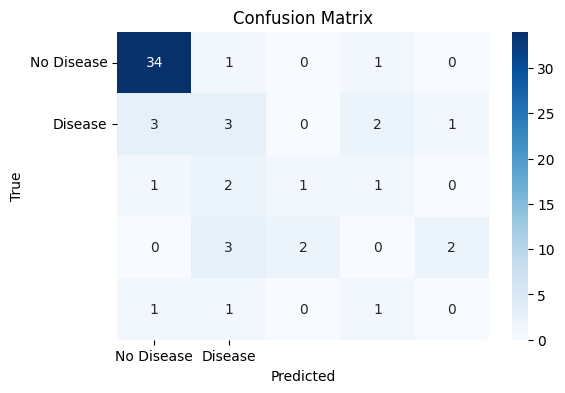

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [34]:
from sklearn.metrics import roc_curve, auc

print(y.value_counts())

print(y.unique())


target
0.0    160
1.0     54
2.0     35
3.0     35
4.0     13
Name: count, dtype: int64
[0. 2. 1. 3. 4.]


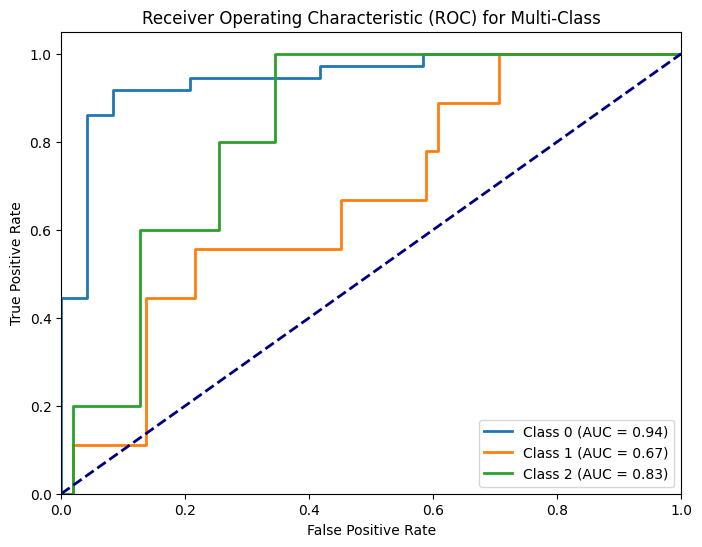

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Change classes if needed
y_pred_prob = model.predict_proba(X_test)

# For each class, compute ROC curve
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()
